<a href="https://colab.research.google.com/github/khoirurrizall1926-sudo/dataset_umr1/blob/main/UAS_ML_FAIZA_RAHMA_2211010055.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Jumlah data  : 150
Jumlah fitur : 4

Nama fitur:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Distribusi kelas target:
target
0    50
1    50
2    50
Name: count, dtype: int64


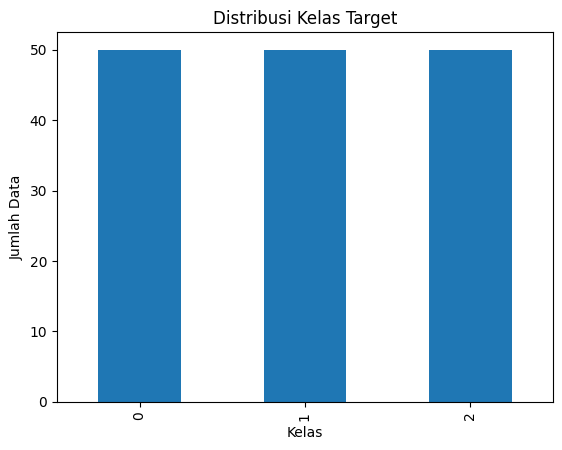


Accuracy : 1.0
Precision: 1.0
Recall   : 1.0
F1-score : 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [2]:
# ==============================
# 1. IMPORT LIBRARY
# ==============================
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# ==============================
# 2. LOAD DATASET
# ==============================
iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# ==============================
# 3. EKSPLORASI DATA
# ==============================
# Jumlah data & fitur
print("Jumlah data  :", df.shape[0])
print("Jumlah fitur :", df.shape[1] - 1)

# Nama fitur
print("\nNama fitur:")
for f in iris.feature_names:
    print("-", f)

# Distribusi kelas target
print("\nDistribusi kelas target:")
print(df['target'].value_counts())

df['target'].value_counts().plot(kind='bar')
plt.title("Distribusi Kelas Target")
plt.xlabel("Kelas")
plt.ylabel("Jumlah Data")
plt.show()

# ==============================
# 4. PREPROCESSING
# ==============================
X = df.iloc[:, :-1]
y = df['target']

# Split data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================
# 5. MODEL KNN (k=5)
# ==============================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Prediksi
y_pred = knn.predict(X_test_scaled)

# ==============================
# 6. EVALUASI MODEL
# ==============================
print("\nAccuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall   :", recall_score(y_test, y_pred, average='macro'))
print("F1-score :", f1_score(y_test, y_pred, average='macro'))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))
